In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
warnings.filterwarnings("ignore")

In [2]:
from pandas_profiling import ProfileReport

In [3]:
predictors_df = pd.read_excel("./data/predictors.xlsx")

In [4]:
target_df = pd.read_excel("./data/target.xlsx")

In [216]:
predictors_df.head()

,IDATE,USER_ID,ISWALLETUSER,PAY_CNT_ALL_40D,PAY_CNT_MOB_40D,PAY_SUM_ALL_40D,PAY_SUM_MOB_40D,MOB_NUMB_UNIQ_PAY_CNT_40D,SPEND_BONUS_SUM_40D,SPEND_BONUS_PRC_40D,...,MAX_PAY_SUM_MOB_40D,DEVICE_CNT_40D,UNIQ_CL_CNT_TO_DEVICE_40D,IS_FIO_CORRECT,PAY_CNT_IN_REGDAY,PAY_CNT_MOB_IN_REGDAY,PAY_CNT_IN_REGDAY_24H,PAY_CNT_MOB_IN_REGDAY_24H,PAY_CNT_IN_REGDAY_48H,PAY_CNT_MOB_IN_REGDAY_48H
0,01-FEB-18,1350,1,8,1,10394,200,1,158,7,...,200.0,0,0,1,0,0,0,0,0,0
1,01-FEB-18,2609,1,1,0,50,0,0,10,20,...,0.0,1,1,1,0,0,0,0,0,0
2,01-FEB-18,3504,1,3,0,46834,0,0,1414,2,...,0.0,0,0,1,0,0,0,0,0,0
3,01-FEB-18,5208,1,5,2,21521,2700,2,0,0,...,2200.0,1,1,1,0,0,0,0,0,0
4,01-FEB-18,5691,1,4,0,73000,0,0,0,0,...,0.0,1,1,1,0,0,0,0,0,0


In [217]:
predictors_df["PAY_CNT_MOB_IN_REGDAY"].value_counts().isna().count()

37

In [218]:
predictors_df["PAY_CNT_IN_REGDAY"].value_counts().isna().count()

54

In [219]:
target_df.head()

,USER_ID,PHONE,IS_WALLET_USER,IDATE
0,3033836.0,7072869756,1.0,01-FEB-18 12.00.00.000000000 AM
1,3556523.0,7021820541,1.0,01-FEB-18 12.00.00.000000000 AM
2,3580533.0,7076196504,1.0,01-FEB-18 12.00.00.000000000 AM
3,1930515.0,7785056016,1.0,01-FEB-18 12.00.00.000000000 AM
4,2904966.0,7076797683,1.0,01-FEB-18 12.00.00.000000000 AM


In [7]:
profile = ProfileReport(predictors_df)

In [8]:
profile

Number of variables,23
Number of observations,233390
Total Missing (%),0.0%
Total size in memory,41.0 MiB
Average record size in memory,184.0 B
Numeric,17
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,5


In [220]:
rejected_features = ['IDATE', 
                     'ISWALLETUSER', 
                     'MOB_NUMB_UNIQ_PAY_CNT_40D', 
#                      'PAY_CNT_MOB_IN_REGDAY', 
#                      'PAY_CNT_MOB_IN_REGDAY_24H',
#                      'PAY_CNT_IN_REGDAY',
#                      'PAY_CNT_IN_REGDAY_24H',
#                      'PAY_CNT_IN_REGDAY_48H',
#                      'PAY_CNT_MOB_IN_REGDAY_48H'
                    ]

In [221]:
cleaned_predictors_df = predictors_df.drop(rejected_features, axis=1)

In [222]:
target_df_with_new_feature = target_df.copy()[target_df["IDATE"] == "01-FEB-18 12.00.00.000000000 AM"]
target_df_with_new_feature["blacklisted"] = 1

In [360]:
target_df_with_new_feature = target_df_with_new_feature[target_df_with_new_feature["IS_WALLET_USER"] == 1].dropna().drop_duplicates()

In [361]:
labeled_target_df = target_df_with_new_feature.drop(["PHONE", "IS_WALLET_USER", "IDATE"], axis=1)

In [362]:
merged_df = pd.merge(cleaned_predictors_df, labeled_target_df, how='left')

In [363]:
merged_df.head()

,USER_ID,PAY_CNT_ALL_40D,PAY_CNT_MOB_40D,PAY_SUM_ALL_40D,PAY_SUM_MOB_40D,SPEND_BONUS_SUM_40D,SPEND_BONUS_PRC_40D,MAX_PAY_SUM_40D,ALL_NUM_CNT_PAY_40D,MAX_PAY_TO_1MOB_CNT_40D,...,DEVICE_CNT_40D,UNIQ_CL_CNT_TO_DEVICE_40D,IS_FIO_CORRECT,PAY_CNT_IN_REGDAY,PAY_CNT_MOB_IN_REGDAY,PAY_CNT_IN_REGDAY_24H,PAY_CNT_MOB_IN_REGDAY_24H,PAY_CNT_IN_REGDAY_48H,PAY_CNT_MOB_IN_REGDAY_48H,blacklisted
0,1350,8,1,10394,200,158,7,3150.00,1,1,...,0,0,1,0,0,0,0,0,0,NaN
1,2609,1,0,50,0,10,20,50.00,0,0,...,1,1,1,0,0,0,0,0,0,NaN
2,3504,3,0,46834,0,1414,2,30333.85,0,0,...,0,0,1,0,0,0,0,0,0,NaN
3,5208,5,2,21521,2700,0,0,12890.51,2,1,...,1,1,1,0,0,0,0,0,0,NaN
4,5691,4,0,73000,0,0,0,45000.00,0,0,...,1,1,1,0,0,0,0,0,0,NaN


In [364]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233390 entries, 0 to 233389
Data columns (total 21 columns):
USER_ID                      233390 non-null int64
PAY_CNT_ALL_40D              233390 non-null int64
PAY_CNT_MOB_40D              233390 non-null int64
PAY_SUM_ALL_40D              233390 non-null int64
PAY_SUM_MOB_40D              233390 non-null int64
SPEND_BONUS_SUM_40D          233390 non-null int64
SPEND_BONUS_PRC_40D          233390 non-null int64
MAX_PAY_SUM_40D              233390 non-null float64
ALL_NUM_CNT_PAY_40D          233390 non-null int64
MAX_PAY_TO_1MOB_CNT_40D      233390 non-null int64
MAX_PAY_SUM_MOB_40D          233390 non-null float64
DEVICE_CNT_40D               233390 non-null int64
UNIQ_CL_CNT_TO_DEVICE_40D    233390 non-null int64
IS_FIO_CORRECT               233390 non-null int64
PAY_CNT_IN_REGDAY            233390 non-null int64
PAY_CNT_MOB_IN_REGDAY        233390 non-null int64
PAY_CNT_IN_REGDAY_24H        233390 non-null int64
PAY_CNT_MOB_IN_REG

In [365]:
cleaned_merged_df = merged_df.fillna({'blacklisted': 0})

In [366]:
cleaned_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233390 entries, 0 to 233389
Data columns (total 21 columns):
USER_ID                      233390 non-null int64
PAY_CNT_ALL_40D              233390 non-null int64
PAY_CNT_MOB_40D              233390 non-null int64
PAY_SUM_ALL_40D              233390 non-null int64
PAY_SUM_MOB_40D              233390 non-null int64
SPEND_BONUS_SUM_40D          233390 non-null int64
SPEND_BONUS_PRC_40D          233390 non-null int64
MAX_PAY_SUM_40D              233390 non-null float64
ALL_NUM_CNT_PAY_40D          233390 non-null int64
MAX_PAY_TO_1MOB_CNT_40D      233390 non-null int64
MAX_PAY_SUM_MOB_40D          233390 non-null float64
DEVICE_CNT_40D               233390 non-null int64
UNIQ_CL_CNT_TO_DEVICE_40D    233390 non-null int64
IS_FIO_CORRECT               233390 non-null int64
PAY_CNT_IN_REGDAY            233390 non-null int64
PAY_CNT_MOB_IN_REGDAY        233390 non-null int64
PAY_CNT_IN_REGDAY_24H        233390 non-null int64
PAY_CNT_MOB_IN_REG

In [367]:
final_cleaned_merged_df = cleaned_merged_df.dropna().drop(["USER_ID"], axis=1)

In [368]:
final_cleaned_merged_df.head()

,PAY_CNT_ALL_40D,PAY_CNT_MOB_40D,PAY_SUM_ALL_40D,PAY_SUM_MOB_40D,SPEND_BONUS_SUM_40D,SPEND_BONUS_PRC_40D,MAX_PAY_SUM_40D,ALL_NUM_CNT_PAY_40D,MAX_PAY_TO_1MOB_CNT_40D,MAX_PAY_SUM_MOB_40D,DEVICE_CNT_40D,UNIQ_CL_CNT_TO_DEVICE_40D,IS_FIO_CORRECT,PAY_CNT_IN_REGDAY,PAY_CNT_MOB_IN_REGDAY,PAY_CNT_IN_REGDAY_24H,PAY_CNT_MOB_IN_REGDAY_24H,PAY_CNT_IN_REGDAY_48H,PAY_CNT_MOB_IN_REGDAY_48H,blacklisted
0,8,1,10394,200,158,7,3150.00,1,1,200.0,0,0,1,0,0,0,0,0,0,0.0
1,1,0,50,0,10,20,50.00,0,0,0.0,1,1,1,0,0,0,0,0,0,0.0
2,3,0,46834,0,1414,2,30333.85,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0
3,5,2,21521,2700,0,0,12890.51,2,1,2200.0,1,1,1,0,0,0,0,0,0,0.0
4,4,0,73000,0,0,0,45000.00,0,0,0.0,1,1,1,0,0,0,0,0,0,0.0


In [369]:
final_cleaned_merged_df["blacklisted"].value_counts()

0.0    228795
1.0      4595
Name: blacklisted, dtype: int64

In [370]:
final_cleaned_merged_df = final_cleaned_merged_df.drop_duplicates()

In [371]:
from sklearn.preprocessing import StandardScaler

In [372]:
scaler = StandardScaler()

In [373]:
X, y = final_cleaned_merged_df.drop(["blacklisted"], axis=1), final_cleaned_merged_df["blacklisted"].as_matrix()

In [374]:
X_scaled = scaler.fit_transform(X)

In [375]:
X_scaled.shape

(210567, 19)

In [376]:
y = y.reshape(-1, 1)

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15)

In [379]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, Add
from keras.utils import to_categorical

In [380]:
features_size = X_train.shape[1]
num_classes = 2

In [402]:
model = Sequential()
model.add(Dense(10, input_shape=(features_size,), kernel_initializer='normal'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(5, kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [403]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [404]:
from sklearn.utils import class_weight
y_train_t = y_train.reshape(-1)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_t), y_train_t)

In [405]:
batch_size = 128
epochs = 5
history = model.fit(X_train, to_categorical(y_train),
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3,
                    class_weight=class_weights,
                    shuffle=True)

Train on 125286 samples, validate on 53695 samples
Epoch 1/5
125286/125286 [==============================] - 16s 126us/step - loss: 0.0617 - acc: 0.9858 - val_loss: 0.0430 - val_acc: 0.9857
Epoch 2/5
125286/125286 [==============================] - 16s 124us/step - loss: 0.0422 - acc: 0.9862 - val_loss: 0.0418 - val_acc: 0.9857
Epoch 3/5
125286/125286 [==============================] - 12s 93us/step - loss: 0.0410 - acc: 0.9862 - val_loss: 0.0407 - val_acc: 0.9857
Epoch 4/5
125286/125286 [==============================] - 14s 112us/step - loss: 0.0403 - acc: 0.9862 - val_loss: 0.0401 - val_acc: 0.9857
Epoch 5/5
125286/125286 [==============================] - 13s 105us/step - loss: 0.0404 - acc: 0.9862 - val_loss: 0.0398 - val_acc: 0.9857


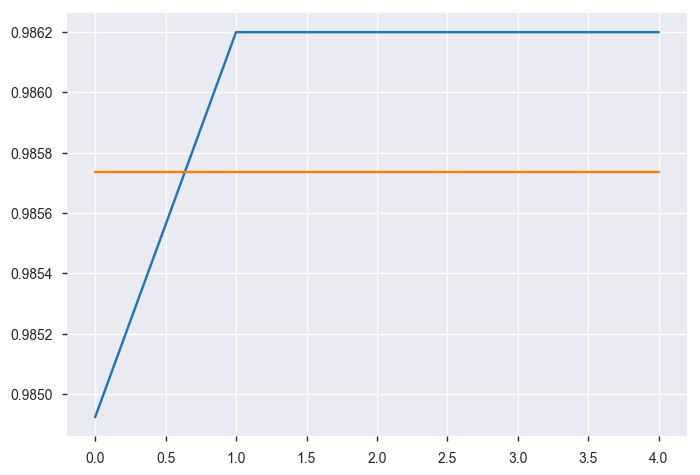

In [389]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

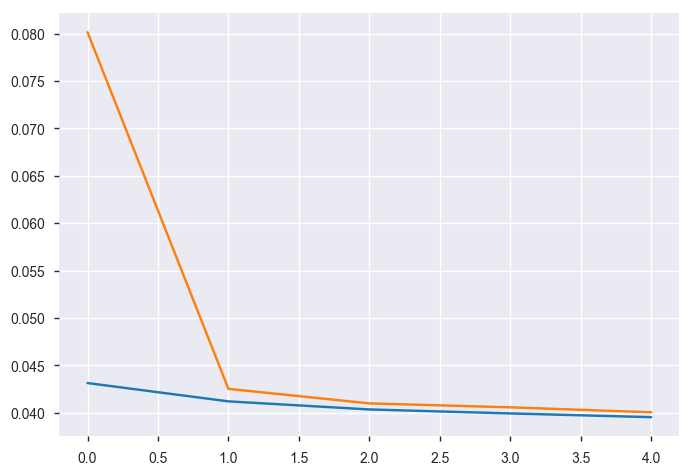

In [397]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [391]:
score = model.evaluate(X_test, y_test, batch_size=1, verbose=1)
print('Test accuracy:', score[1])

31586/31586 [==============================] - 51s 2ms/step
Test accuracy: 0.9859431393655417


In [392]:
y_test_df = pd.Series(y_test.reshape(-1))

In [393]:
y_test_df.value_counts()

0.0    31142
1.0      444
dtype: int64

In [394]:
y_train_df = pd.Series(y_train.reshape(-1))

In [395]:
y_train_df.value_counts()

0.0    176486
1.0      2495
dtype: int64

In [396]:
pred = model.predict(X_test)

In [341]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, np.argmax(pred, axis=1)))

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     31152
        1.0       0.63      0.10      0.17       434

avg / total       0.98      0.99      0.98     31586



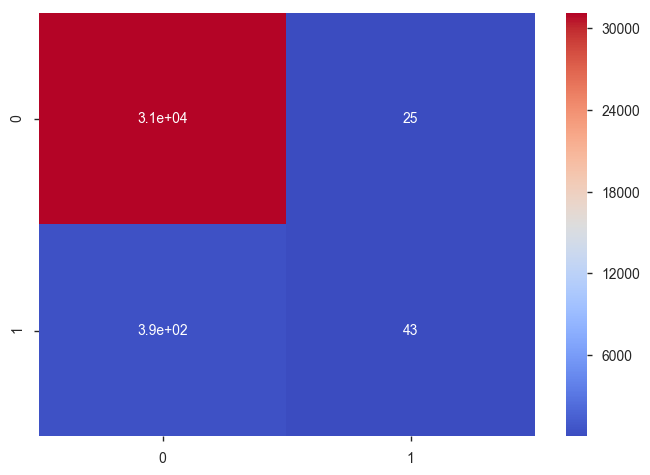

In [342]:
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), cmap="coolwarm", annot=True)